In [7]:
import pandas as pd

# 讀取 CSV 檔案
train_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/train.csv')
test_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/test.csv')
stores_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/stores.csv')
oil_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/oil.csv')
holidays_events_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/holidays_events.csv')
sample_submission_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/sample_submission.csv')
transactions_df = pd.read_csv('/Users/zyta/Desktop/kaggle/store-sales-time-series-forecasting/transactions.csv')

# 查看各個資料集的形狀與前幾筆數據
print("Train dataset shape:", train_df.shape)
print(train_df.head(), "\n")

print("Test dataset shape:", test_df.shape)
print(test_df.head(), "\n")

print("Stores dataset shape:", stores_df.shape)
print(stores_df.head(), "\n")

print("Oil dataset shape:", oil_df.shape)
print(oil_df.head(), "\n")

print("Holidays & Events dataset shape:", holidays_events_df.shape)
print(holidays_events_df.head(), "\n")

print("Sample Submission dataset shape:", sample_submission_df.shape)
print(sample_submission_df.head(), "\n")

print("Transactions dataset shape:", transactions_df.shape)
print(transactions_df.head(), "\n")

Train dataset shape: (3000888, 6)
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0 

Test dataset shape: (28512, 5)
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0 

Stores dataset shape: (54, 5)
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito      

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
print(train_df.describe())

                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02


In [54]:
train_df['date'] = pd.to_datetime(train_df['date'])
print(train_df['date'].head())

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: date, dtype: datetime64[ns]


In [11]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [12]:
print(stores_df.describe())

       store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000


In [13]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [14]:
print(oil_df.describe())

        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000


In [15]:
oil_df['date'] = pd.to_datetime(oil_df['date'])
print(oil_df['date'].head())

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: date, dtype: datetime64[ns]


In [16]:
holidays_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [17]:
print(holidays_events_df.describe())

              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338


In [18]:
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])
print(holidays_events_df['date'].head())

0   2012-03-02
1   2012-04-01
2   2012-04-12
3   2012-04-14
4   2012-04-21
Name: date, dtype: datetime64[ns]


In [19]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [20]:
print(transactions_df.describe())

          store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.000000   1393.000000
75%       40.000000   2079.000000
max       54.000000   8359.000000


In [21]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
print(transactions_df['date'].head())

0   2013-01-01
1   2013-01-02
2   2013-01-02
3   2013-01-02
4   2013-01-02
Name: date, dtype: datetime64[ns]


In [ ]:
# 改為推薦的寫法處理缺失值
# 針對油價，使用前向填充（forward fill）來補缺失值
if 'dcoilwtico' in oil_df.columns:
    oil_df['dcoilwtico'] = oil_df['dcoilwtico'].ffill()

In [29]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1217 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [32]:
# 再次填補剩餘的缺失值：用最近的非空值填補
oil_df["dcoilwtico"] = oil_df["dcoilwtico"].fillna(method="bfill")

# 確保所有缺失值已填補
oil_missing_final = oil_df.isnull().sum()
oil_missing_final

/var/folders/j1/symmvkp556142bj5zm6234rw0000gn/T/ipykernel_6389/1752594190.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_df["dcoilwtico"] = oil_df["dcoilwtico"].fillna(method="bfill")


date          0
dcoilwtico    0
dtype: int64

In [33]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [36]:
# 為假日資料創建 is_holiday 欄位
holidays_events_df['is_holiday'] = 1

# 只取必要的欄位，並去除重複的日期
holidays_temp = holidays_events_df[['date', 'is_holiday']].drop_duplicates()

# 將日期轉換為 datetime 格式（如果還未轉換）
holidays_temp['date'] = pd.to_datetime(holidays_temp['date'])
train_df['date'] = pd.to_datetime(train_df['date'])

# 合併假日資訊到主數據集中
train_df = pd.merge(train_df, holidays_temp, on='date', how='left')

# 對沒有假日資訊的日期填入 0
train_df['is_holiday'] = train_df['is_holiday'].fillna(0)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   is_holiday   float64       
 7   dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 183.2+ MB


In [38]:
train_df = pd.merge(train_df, oil_df, on='date', how='left')

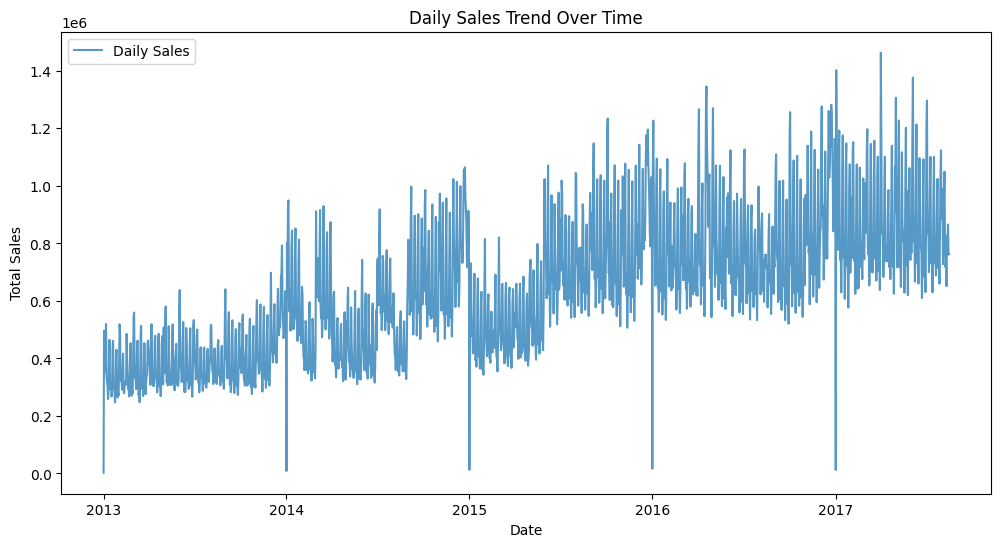

In [40]:
import matplotlib.pyplot as plt

# 按日期聚合銷售數據，計算每日總銷售額
daily_sales = train_df.groupby("date")["sales"].sum()

# 繪製每日銷售趨勢
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label="Daily Sales", alpha=0.75)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend Over Time")
plt.legend()
plt.show()

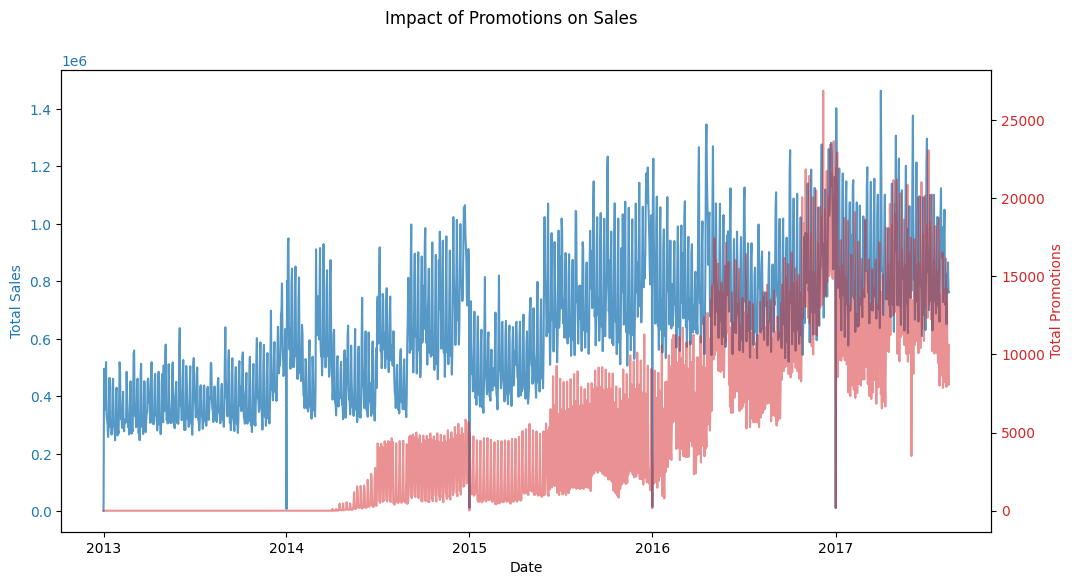

In [ ]:
# 1. 分析促銷活動對銷售的影響

# 按日期聚合促銷商品數量
daily_promotion = train_df.groupby("date")["onpromotion"].sum()

# 繪製促銷商品數量與銷售額的關係
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel("Total Sales", color="tab:blue")
ax1.plot(daily_sales.index, daily_sales.values, label="Daily Sales", color="tab:blue", alpha=0.75)
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()  # 創建第二個y軸
ax2.set_ylabel("Total Promotions", color="tab:red")
ax2.plot(daily_promotion.index, daily_promotion.values, label="Total Promotions", color="tab:red", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.suptitle("Impact of Promotions on Sales")
plt.show()

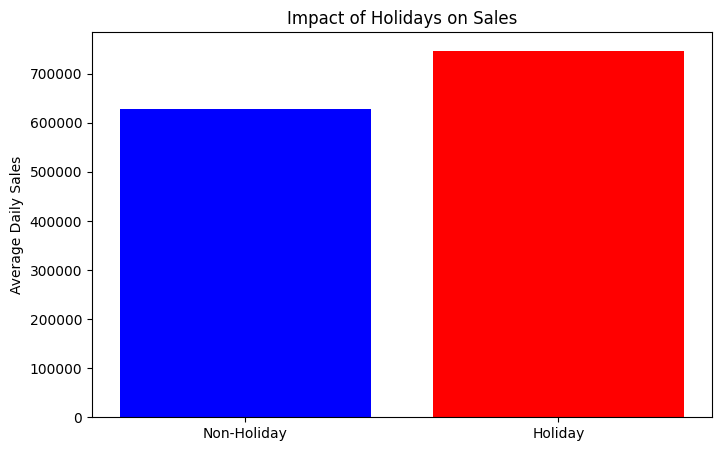

In [43]:
# 2. 分析節假日對銷售的影響

# 篩選出非轉移的正式節假日
official_holidays = holidays_events_df[(holidays_events_df["transferred"] == False) & 
                                       (holidays_events_df["locale"] == "National")]

# 合併節假日與銷售數據
daily_sales_holiday = daily_sales.reset_index()
daily_sales_holiday["is_holiday"] = daily_sales_holiday["date"].isin(official_holidays["date"])

# 計算節假日與非節假日的平均銷售額
holiday_sales = daily_sales_holiday.groupby("is_holiday")["sales"].mean()

# 繪製柱狀圖比較
plt.figure(figsize=(8, 5))
plt.bar(["Non-Holiday", "Holiday"], holiday_sales, color=["blue", "red"])
plt.ylabel("Average Daily Sales")
plt.title("Impact of Holidays on Sales")
plt.show()

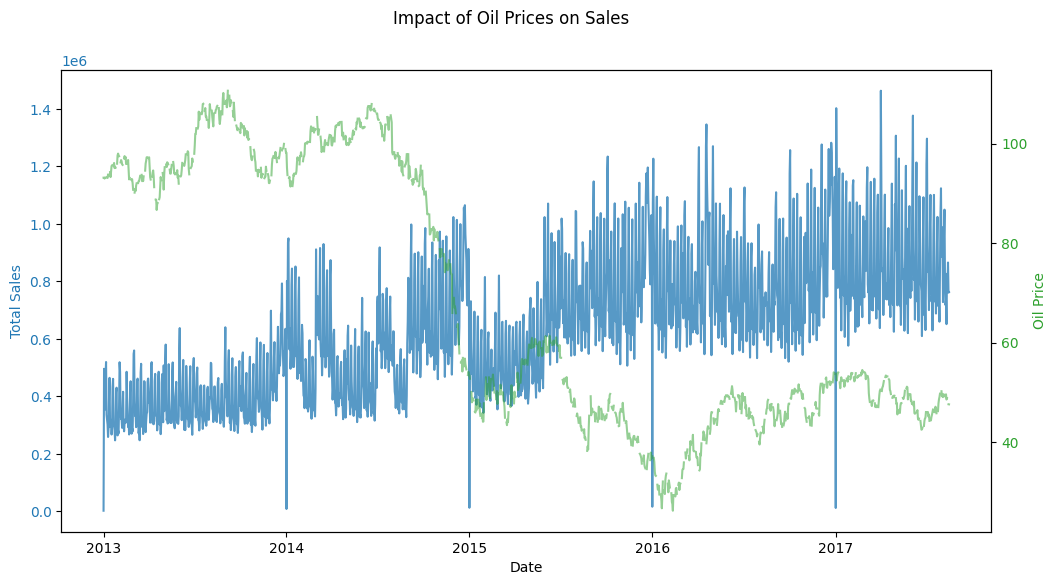

In [44]:
# 3. 分析油價對銷售的影響

# 合併油價與銷售數據
sales_oil_df = pd.merge(daily_sales.reset_index(), oil_df, on="date", how="left")

# 繪製油價與銷售趨勢
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel("Total Sales", color="tab:blue")
ax1.plot(sales_oil_df["date"], sales_oil_df["sales"], label="Daily Sales", color="tab:blue", alpha=0.75)
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()  # 創建第二個y軸
ax2.set_ylabel("Oil Price", color="tab:green")
ax2.plot(sales_oil_df["date"], sales_oil_df["dcoilwtico"], label="Oil Price", color="tab:green", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="tab:green")

fig.suptitle("Impact of Oil Prices on Sales")
plt.show()

In [47]:
# 4. 深度分析促銷對不同產品類別的影響

# 按產品類別計算平均促銷數量與平均銷售額
family_promotion_sales = train_df.groupby("family").agg(
    avg_sales=("sales", "mean"),
    avg_promotion=("onpromotion", "mean")
).sort_values(by="avg_promotion", ascending=False)

# 顯示結果
from IPython.display import display
display(family_promotion_sales)  # 顯示 DataFrame

,avg_sales,avg_promotion
family,,
GROCERY I,3776.972100,21.056578
PRODUCE,1349.352123,12.293492
BEVERAGES,2385.793151,9.973586
DAIRY,709.154889,8.013405
CLEANING,1072.416744,7.270575
DELI,265.135067,6.414577
BREAD/BAKERY,463.336254,3.643101
MEATS,341.849965,3.343318
PERSONAL CARE,270.432513,2.715404


In [48]:
#5. 產品類別 One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=["family"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["family"], drop_first=True)


In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 28512 non-null  int64 
 1   date                               28512 non-null  object
 2   store_nbr                          28512 non-null  int64 
 3   onpromotion                        28512 non-null  int64 
 4   family_BABY CARE                   28512 non-null  bool  
 5   family_BEAUTY                      28512 non-null  bool  
 6   family_BEVERAGES                   28512 non-null  bool  
 7   family_BOOKS                       28512 non-null  bool  
 8   family_BREAD/BAKERY                28512 non-null  bool  
 9   family_CELEBRATION                 28512 non-null  bool  
 10  family_CLEANING                    28512 non-null  bool  
 11  family_DAIRY                       28512 non-null  bool  
 12  fami

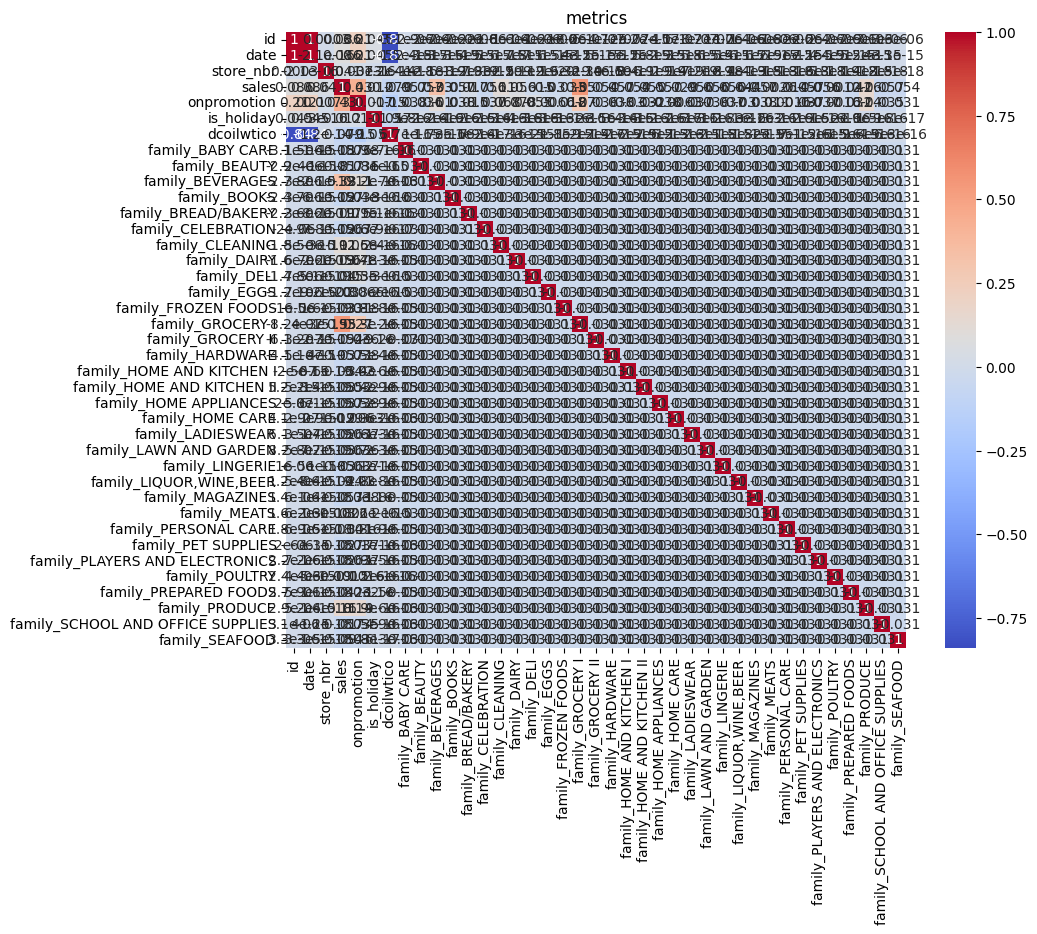

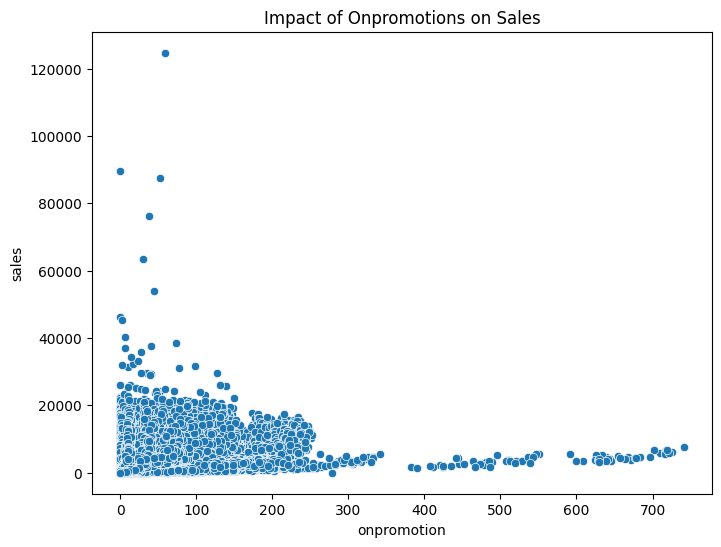

In [ ]:
# 分組比較：以店鋪編號比較銷售分佈
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='store_nbr', y='sales')
plt.title('不同店鋪的銷售分佈')
plt.xlabel('store_nbr')
plt.ylabel('sales')
plt.show()

# 分組比較：以產品家族比較銷售分佈
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='family', y='sales')
plt.title('不同產品家族的銷售分佈')
plt.xlabel('family')
plt.ylabel('sales')
plt.xticks(rotation=45)  # 若類別太多，調整角度以便顯示
plt.show()